In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('NationalNames.csv')

In [3]:
data.tail()

,Id,Name,Year,Gender,Count
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [4]:
max(data['Count'])

99680

In [5]:
## change year to dateTime year
from datetime import datetime

data['Year'] = data['Year'].apply(lambda x: datetime(year=x, month=1, day=1), 1)
data['Year'][0:5]
# map(lambda x: datetime(year=int(x), month=1, day=1), data['Year'].values())
# pd.to_datetime(data['Year'])

0   1880-01-01
1   1880-01-01
2   1880-01-01
3   1880-01-01
4   1880-01-01
Name: Year, dtype: datetime64[ns]

In [6]:
from_ = data[data['Year'] >= datetime(year=1950, month=1, day=1)]

In [7]:
boys_from = from_[from_['Gender']=='M']
girls_from = from_[from_['Gender']=='F']
all_boys_data = data[data['Gender']=='M']
all_girls_data = data[data['Gender']=='F']

In [8]:
## reset index
boys_from = boys_from.reset_index(drop=True)
girls_from = girls_from.reset_index(drop=True)
all_boys_data = all_boys_data.reset_index(drop=True)
all_girls_data = all_girls_data.reset_index(drop=True)

In [9]:
taylor = girls_from[girls_from['Name']=='Taylor']
ryan = boys_from[boys_from['Name']=='Ryan']
chris = boys_from[boys_from['Name']=='Christopher']# or boys['Name']=='Chris']
syd = girls_from[girls_from['Name']=='Sydney']# or girls['Name']=='Sidney']

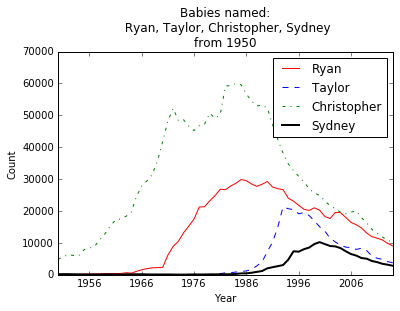

In [10]:
plt.figure(1)
plt.plot(ryan['Year'], ryan['Count'], color='red')
plt.plot(taylor['Year'], taylor['Count'], ls='--', color='blue')
plt.plot(chris['Year'], chris['Count'], ls='-.', color='green')
plt.plot(syd['Year'], syd['Count'], lw=2, color='black')
plt.legend(['Ryan','Taylor','Christopher','Sydney'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Babies named:\n %s, %s, %s, %s\n' % ('Ryan','Taylor',
                                                'Christopher','Sydney')+
                                              'from 1950')
plt.show()

In [11]:
# x = data.groupby(level)
years = data['Year'].unique()

In [12]:
years[0:5]
len(years)

135

In [13]:
max_boys_list = np.array([])#zeros_like(years)
max_girls_list = np.array([])#zeros_like(years)
dict_boys = {}
dict_girls = {}
boy_info = []
girl_info = []
j = 0
for year in years:
    boy = all_boys_data[all_boys_data['Year']==year]
    girl = all_girls_data[all_girls_data['Year']==year]
    max_boy = max(boy['Count'])
    max_girl = max(girl['Count'])
    boy_name = boy[boy['Count']==max_boy]['Name'].to_string().split()[1]
    girl_name = girl[girl['Count']==max_girl]['Name'].to_string().split()[1]
#     print(boy_name)
#     break
    max_boys_list = np.append(max_boys_list, max_boy)
    max_girls_list = np.append(max_girls_list, max_girl)
    
    if boy_name in dict_boys:
        dict_boys[boy_name].append((year, max_boy))
    else:
        dict_boys[boy_name] = [(year, max_boy)]
    if girl_name in dict_girls:
        dict_girls[girl_name].append((year, max_girl))
    else:
        dict_girls[girl_name] = [(year, max_girl)]
    
    boy_info.append([year, boy_name, max_boy, 1])
    girl_info.append([year, girl_name, max_girl, 1])

In [14]:
# len(max_boys)
boys_maxDF = pd.DataFrame(boy_info, columns=['year', 'name', 'count', 'grouper'])
girls_maxDF = pd.DataFrame(girl_info, columns=['year', 'name', 'count', 'grouper'])
del boy_info
del girl_info

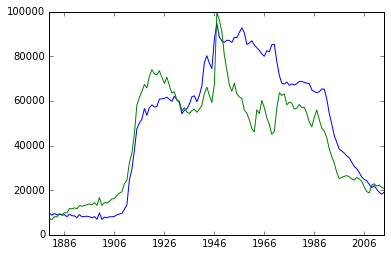

In [15]:
plt.figure(1)
plt.plot(years, max_boys_list)
plt.plot(years, max_girls_list)

In [16]:
'Ryan' in dict_boys

False

In [17]:
girls_maxDF.head()

,year,name,count,grouper
0,1880-01-01,Mary,7065,1
1,1881-01-01,Mary,6919,1
2,1882-01-01,Mary,8148,1
3,1883-01-01,Mary,8012,1
4,1884-01-01,Mary,9217,1


In [18]:
years_from_50s = data[data['Year'] >= datetime(year=1950, month=1, day=1)]['Year']
boys_from_50s = boys_maxDF[boys_maxDF['year'] >= datetime(year=1950, month=1, day=1)]
girls_from_50s = girls_maxDF[girls_maxDF['year'] >= datetime(year=1950, month=1, day=1)]

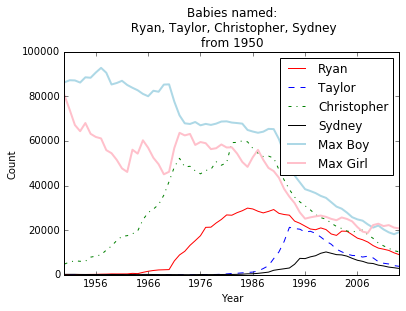

In [19]:
plt.figure(1)
plt.plot(ryan['Year'], ryan['Count'], color='red')
plt.plot(taylor['Year'], taylor['Count'], ls='--', color='blue')
plt.plot(chris['Year'], chris['Count'], ls='-.', color='green')
plt.plot(syd['Year'], syd['Count'], color='black')

plt.plot(boys_from_50s['year'], boys_from_50s['count'], lw=2, color='lightblue')
plt.plot(girls_from_50s['year'], girls_from_50s['count'], lw=2, color='pink')

plt.legend(['Ryan','Taylor','Christopher','Sydney', 'Max Boy', 'Max Girl'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Babies named:\n %s, %s, %s, %s\n' % ('Ryan','Taylor','Christopher','Sydney') + 'from 1950')
plt.show()

In [20]:
# x = input('hit me: ')

In [21]:
# import plotly.tools as tls
import plotly.plotly as py
import plotly.graph_objs as go

scatt_ryan = go.Scatter(
    x = ryan['Year'],
    y = ryan['Count'],
    mode = 'lines',
    name = 'Ryan'
)
scatt_taylor = go.Scatter(
    x = taylor['Year'],
    y = taylor['Count'],
    mode = 'lines',
    name = 'Taylor(F)'
)
scatt_chris = go.Scatter(
    x = chris['Year'],
    y = chris['Count'],
    mode = 'lines',
    name = 'Christopher'
)
scatt_sydney = go.Scatter(
    x = syd['Year'],
    y = syd['Count'],
    mode = 'lines',
    name = 'Sydney'
)
scatt_max_boy_name = go.Scatter(
    x = boys_from_50s['year'],
    y = boys_from_50s['count'],
    mode = 'markers',
    marker=dict(color='rgba(173, 222, 240, 1)'),
    name = 'Top Boy Name',
    text= boys_from_50s['name'],
    hoverinfo='text+name+y'
)
scatt_max_girl_name = go.Scatter(
    x = girls_from_50s['year'],
    y = girls_from_50s['count'],
    mode = 'markers',
    marker=dict(color='rgba(240, 173, 173, 1)'),
    name = 'Top Girl Name',
    text= girls_from_50s['name'],
    hoverinfo='text+name+y'
)


data1 = [scatt_ryan, scatt_taylor, scatt_chris, scatt_sydney, scatt_max_boy_name, scatt_max_girl_name]

# Edit the layout
layout = dict(title = 'Baby name comparison from 1950',
              xaxis = dict(title = 'Year'),
              yaxis = dict(title = 'Count'),
              )

# Plot and embed in ipython notebook!
fig = dict(data=data1, layout=layout)
py.iplot(fig, filename='line-mode')
# data=[ryans]
# py.iplot(data, filename='line-mode')

## Now build an application
 - user can enter up to 5 names to be plotted
 - will keep max, and will add std/var for 'thick' line plot

In [22]:
your_name = input('What is your name? ').strip().split()

What is your name? Rachel


In [23]:
your_name = [i.capitalize() for i in your_name]

In [24]:
your_name

['Rachel']

In [25]:
xy1 = data.groupby(['Year', 'Gender'], as_index=False).agg(np.sum)
del xy1['Id']

In [26]:
xy1.head()

,Year,Gender,Count
0,1880-01-01,F,90993
1,1880-01-01,M,110491
2,1881-01-01,F,91954
3,1881-01-01,M,100745
4,1882-01-01,F,107850


In [27]:
tot_male = xy1.where(xy1.Gender=='M')[xy1['Year'] >= datetime(year=1950, month=1, day=1)].dropna()
tot_female = xy1.where(xy1.Gender=='F')[xy1['Year'] >= datetime(year=1950, month=1, day=1)].dropna()
years_50s = tot_male[tot_male['Year'] >= datetime(year=1950, month=1, day=1)]['Year']


print(len(tot_male['Count']), len(years_50s))
tot_male['Count'] = tot_male['Count'].apply(int)
tot_female['Count'] = tot_female['Count'].apply(int)

tot_male.head()

65 65


,Year,Gender,Count
141,1950-01-01,M,1790673
143,1951-01-01,M,1881080
145,1952-01-01,M,1944277
147,1953-01-01,M,1969777
149,1954-01-01,M,2037374


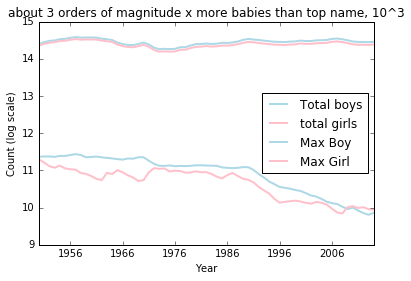

In [28]:
plt.figure(2)
plt.plot(boys_from_50s['year'], np.log(tot_male['Count']), lw=2, color='lightblue')
plt.plot(girls_from_50s['year'], np.log(tot_female['Count']), lw=2, color='pink')

# plt.plot(boys_from_50s['year'], tot_male['Count']/1000000, lw=2, color='lightblue')
# plt.plot(girls_from_50s['year'], tot_female['Count']/1000000, lw=2, color='pink')

plt.plot(boys_from_50s['year'], np.log(boys_from_50s['count']), lw=2, color='lightblue')
plt.plot(girls_from_50s['year'], np.log(girls_from_50s['count']), lw=2, color='pink')

plt.legend(['Total boys','total girls','Max Boy', 'Max Girl'], loc='best')
plt.xlabel('Year')
plt.ylabel('Count (log scale)')
plt.title('about 3 orders of magnitude x more babies than top name, 10^3')
plt.show()

In [29]:
# import plotly.tools as tls
# tls.set_credentials_file(username='rsloot', api_key='23xik4frv1')
import plotly.plotly as py
import plotly.graph_objs as go

scatt_ryan1 = go.Scatter(
    x = ryan['Year'],
    y = ryan['Count'],
    mode = 'lines',
    name = 'Ryan'
)
scatt_max_boy_name1 = go.Scatter(
    x = boys_from_50s['year'],
    y = boys_from_50s['count'],
    mode = 'markers',
    marker=dict(color='rgba(173, 222, 240, 1)'),
    name = 'Top Boy Name',
    text= boys_from_50s['name'],
    hoverinfo='text+name+y'
)
scatt_max_girl_name1 = go.Scatter(
    x = girls_from_50s['year'],
    y = girls_from_50s['count'],
    mode = 'markers',
    marker=dict(color='rgba(240, 173, 173, 1)'),
    name = 'Top Girl Name',
    text= girls_from_50s['name'],
    hoverinfo='text+name+y'
)
scatt_tot_boys1 = go.Scatter(
    x = tot_male[tot_male['Year'] >= datetime(year=1950, month=1, day=1)]['Year'],
    y = tot_male[tot_male['Year'] >= datetime(year=1950, month=1, day=1)]['Count']/10,
    mode = 'line',
    name = 'Total Boys (scaled down by 10)',
    hoverinfo = 'x+y'
)
scatt_tot_girls1 = go.Scatter(
    x = tot_female[tot_female['Year'] >= datetime(year=1950, month=1, day=1)]['Year'],
    y = tot_female[tot_female['Year'] >= datetime(year=1950, month=1, day=1)]['Count']/10,
    mode = 'line',
    name = 'Total Girls (scaled down by 10)',
    hoverinfo = 'x+y'
)

data1 = [scatt_ryan1, scatt_max_boy_name1, scatt_max_girl_name1, scatt_tot_boys1, scatt_tot_girls1]

layout = dict(
    title='Time series with range slider and selectors',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(count=5,
                    label='5y',
                    step='year',
                    stepmode='backward'),
                dict(count=10,
                    label='10y',
                    step='year',
                    stepmode='backward'),
                dict(count=25,
                    label='25y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        title = 'Year',
        type='date'
    ),
    yaxis = dict(title='Count')
)
# Plot and embed in ipython notebook!
fig = dict(data=data1, layout=layout)
py.iplot(fig, filename='slider_line-mode')
# data=[ryans]
# py.iplot(data, filename='line-mode')

In [30]:
dict_df = data.to_dict()

In [31]:
'Michael' in dict_df['Name'].values()

True

In [32]:
tot_male = xy1.where(xy1.Gender=='M').dropna()
tot_female = xy1.where(xy1.Gender=='F').dropna()
tot_male['Count'] = tot_male['Count'].apply(int)
tot_female['Count'] = tot_female['Count'].apply(int)

boys_maxDF
girls_maxDF

tot_male.head()

,Year,Gender,Count
1,1880-01-01,M,110491
3,1881-01-01,M,100745
5,1882-01-01,M,113688
7,1883-01-01,M,104629
9,1884-01-01,M,114445


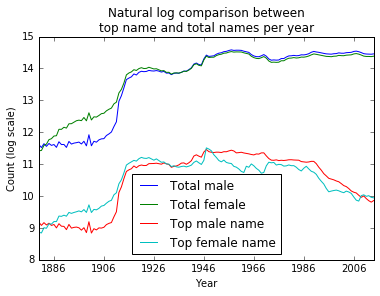

In [33]:
plt.figure(3)
plt.plot(tot_male['Year'], np.log(tot_male['Count']))
plt.plot(tot_female['Year'], np.log(tot_female['Count']))

plt.plot(boys_maxDF['year'], np.log(boys_maxDF['count']))
plt.plot(girls_maxDF['year'], np.log(girls_maxDF['count']))

plt.title('Natural log comparison between\ntop name and total names per year')
plt.xlabel('Year')
plt.ylabel('Count (log scale)')

plt.legend(['Total male','Total female','Top male name','Top female name'], loc='best')

plt.show()

## Observation
- top name has gone from around 1/e^3 (~1/20, ~5%) of total names to ~1/e^4.5 (~1/90, 1%) from 1950 to 2014

let's take a look at top names in 50s as proportion of today's names

In [34]:
# boys_maxDF.head(25)

In [35]:
# x = boys_from_50s['name'].unique()
all_top_boys = boys_maxDF.groupby(['name'], as_index=False).agg(np.sum)
all_top_girls = girls_maxDF.groupby(['name'], as_index=False).agg(np.sum)

In [36]:
# print(all_top_girls.head(20))
all_top_boys

,name,count,grouper
0,David,85931,1
1,Jacob,370429,14
2,James,1056117,13
3,John,861421,44
4,Michael,3084696,44
5,Noah,37323,2
6,Robert,1041736,17


In [37]:
all_top_girls

,name,count,grouper
0,Ashley,81935,2
1,Emily,294429,12
2,Emma,39598,2
3,Isabella,45161,2
4,Jennifer,859197,15
5,Jessica,397914,9
6,Linda,508355,6
7,Lisa,420572,8
8,Mary,3098226,76
9,Sophia,65230,3


In [38]:
assert len(years) == sum(all_top_boys['grouper'])
assert len(years) == sum(all_top_girls['grouper'])

In [39]:
michael = all_boys_data[all_boys_data['Name'] == 'Michael']
mary = all_girls_data[all_girls_data['Name'] == 'Mary']

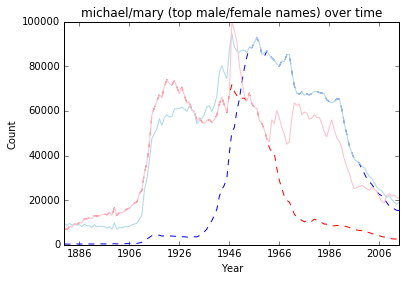

In [40]:
## michael/mary (top male/female names) over time
plt.figure(4)
plt.plot(years, michael['Count'], ls='--', color='blue')
plt.plot(years, mary['Count'], ls='--', color='red')

plt.plot(years, boys_maxDF['count'], color='lightblue')
plt.plot(years, girls_maxDF['count'], color='pink')

plt.title('michael/mary (top male/female names) over time')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

#### All top names now

In [41]:
blist = all_top_boys['name']
glist = all_top_girls['name']
# michael = all_boys_data[all_boys_data['Name'] == 'Michael']
# mary = all_girls_data[all_girls_data['Name'] == 'Mary']
boys_dfs=[]
girls_dfs=[]
for name in blist:
    boys_dfs.append(all_boys_data[all_boys_data['Name']==name])
for name in glist:
    girls_dfs.append(all_girls_data[all_girls_data['Name'] == name])

In [42]:
# boys_dfs[0][]

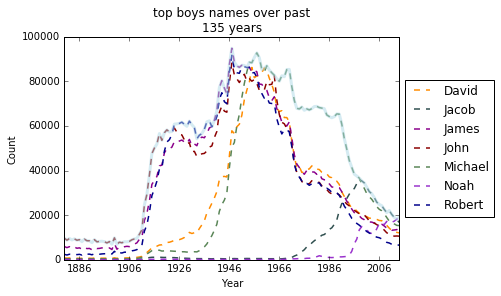

In [43]:
# plotting top boys/girls names over past 135 years
import random
import matplotlib.colors as colors

dark_colors = [i for i in list(colors.cnames.keys()) if 'dark' in i]

idex = [random.randint(0, len(list(colors.cnames.keys()))) for _ in blist]
colors = [list(colors.cnames.keys())[i] for i in idex]


plt.figure(5)
# fig, (ax0, ax1) = plt.subplots(2)
i = 0
for boy in boys_dfs:
    plt.plot(boy['Year'], boy['Count'], lw=1.5, ls='--', color=dark_colors[i])
    i +=1
plt.plot(years, boys_maxDF['count'], lw=3, color='lightblue', alpha=0.5)
plt.title('top boys names over past\n135 years')
plt.xlabel('Year')
plt.ylabel('Count')
# plt.legend(blist, loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
# plt.legend(blist, loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
plt.legend(blist, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

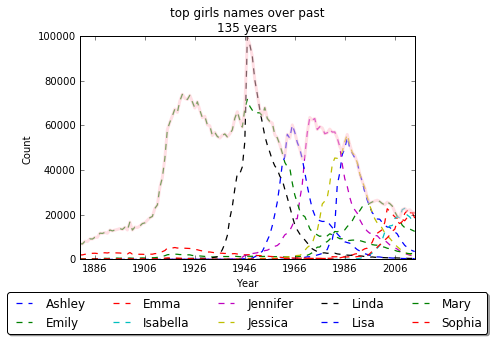

In [44]:
plt.figure(6)
## girls plot
for girl in girls_dfs:
    plt.plot(girl['Year'], girl['Count'], lw=1.25, ls='--')

plt.plot(years, girls_maxDF['count'], lw=3, color='pink', alpha=0.5)
plt.title('top girls names over past\n135 years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(glist, loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=True, ncol=5)

plt.show()

tough to read, but interesting tid bits: Emily new to scene in ~1990s to top name
***

In [45]:
for i in range(1,len(boys_dfs)):
#     print(b.head())
#     break
    del boys_dfs[i]['Gender'], boys_dfs[i]['Id']
    boys_dfs[i] = boys_dfs[i].reset_index(drop=True)
#     boys_dfs[i]['Year'].apply(lambda x: datetime(year=x, month=1, day=1), 1)
    boys_dfs[i]['x'] = boys_dfs[i]['Year'].apply(lambda x: x.year)
boys_dfs[1].head()

,Name,Year,Count,x
0,Jacob,1880-01-01,404,1880
1,Jacob,1881-01-01,381,1881
2,Jacob,1882-01-01,390,1882
3,Jacob,1883-01-01,356,1883
4,Jacob,1884-01-01,381,1884


In [46]:
# michael = michael.reset_index(drop=True)

# michael.head()
# pd.DataFrame.reindex?
# boys_maxDF = boys_maxDF.reset_index(drop=True)
boys_maxDF['x'] = boys_maxDF['year'].apply(lambda x: x.year)
# boys_dfs[2].head()

In [47]:
#ploty version
dat = []
i = 0
for b in boys_dfs:
    dat.append(go.Scatter(
                    x = b['Year'],
                    y = b['Count'],
                    mode = 'lines',
                    name = b['Name'].values[0],
                    hoverinfo = 'x+name+y'))
dat.append(go.Scatter(
            x = boys_maxDF['year'],
            y = boys_maxDF['count'],
            mode = 'markers',
            marker=dict(color='rgba(173, 222, 240, 1)'),
            name = 'Top Boy Name',
            text= boys_maxDF['name'],
            hoverinfo='x+text+name+y'))

# # Edit the layout
layout = dict(
    title='Top boys names over time',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(count=5,
                    label='5y',
                    step='year',
                    stepmode='backward'),
                dict(count=10,
                    label='10y',
                    step='year',
                    stepmode='backward'),
                dict(count=25,
                    label='25y',
                    step='year',
                    stepmode='backward'),
                dict(count=50,
                    label='50y',
                    step='year',
                    stepmode='backward'),
                dict(count=100,
                    label='100y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        title = 'Year',
        type='date'
    ),
    yaxis = dict(title='Count')
)

# # Plot and embed in ipython notebook!
fig = dict(data=dat, layout=layout)
py.iplot(fig, filename='top-boys-overtime')

In [48]:
# print(type(dat[0]))

In [49]:
# gender would be radio button
names = input('name(s) seperated by space all same gender(i.e. Ryan John Jack): ').strip().split()

name(s) seperated by space all same gender(i.e. Ryan John Jack): Ryan Michael Joe John Jack


In [50]:
gender = input('gender of each? ').strip().upper()

gender of each? m


In [51]:
import re
# print(*names)
if re.match('^[mMfF]', gender):
    gender = gender[0].upper()
for i in range(len(names)):
    if re.match('[a-zA-Z]+', names[i]):
        names[i] = names[i].capitalize()
print('thanks!-- name(s): %s | gender: %s' % (names, gender))

thanks!-- name(s): ['Ryan', 'Michael', 'Joe', 'John', 'Jack'] | gender: M


In [52]:
# print(name, gender)
# all_boys_data.head()

In [53]:
user_names = []
if gender == 'M':
    for name in names:
        user_names.append(all_boys_data[all_boys_data['Name'] == name])
else:
    for name in names:
        user_names.append(all_girls_data[all_girls_data['Name'] == name])

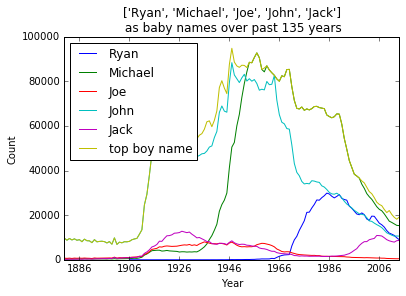

In [54]:
plt.figure(5.1)
names = []
for name in user_names:
    plt.plot(name['Year'], name['Count'])
    names.append(name['Name'].values[0])
    
## total boys baby names, top boy name
if gender == 'M':
#     plt.plot(tot_male['Year'], tot_male['Count']/10)
    plt.plot(boys_maxDF['year'], boys_maxDF['count'])
    names += ['top boy name']
else:
#     plt.plot(tot_female['Year'], tot_female['Count']/10)
    plt.plot(girls_maxDF['year'], girls_maxDF['count'])
    names += ['top girl']

plt.title('%s\n as baby names over past 135 years' % names[:-1])
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(names, loc='best')
plt.show()